In [1]:
!pip install -q zarr gcsfs fsspec
!pip install -q xarray

import xarray as xr
import matplotlib.pyplot as plt

store_url = 'https://ncsa.osn.xsede.org/Pangeo/pangeo-forge/pangeo-forge/AGDC-feedstock/AGCD.zarr'
ds = xr.open_dataset(store_url, engine="zarr", chunks={})

# Inspect variables
print(ds)

<xarray.Dataset>
Dimensions:     (lat: 691, lon: 886, time: 17897)
Coordinates:
  * lat         (lat) float32 -44.5 -44.45 -44.4 -44.35 ... -10.1 -10.05 -10.0
  * lon         (lon) float32 112.0 112.1 112.1 112.2 ... 156.1 156.2 156.2
  * time        (time) datetime64[ns] 1971-01-01T09:00:00 ... 2019-12-31T09:0...
Data variables:
    precip      (time, lat, lon) float32 dask.array<chunksize=(40, 691, 886), meta=np.ndarray>
    tmax        (time, lat, lon) float32 dask.array<chunksize=(40, 691, 886), meta=np.ndarray>
    tmin        (time, lat, lon) float32 dask.array<chunksize=(40, 691, 886), meta=np.ndarray>
    vapourpres  (time, lat, lon) float32 dask.array<chunksize=(40, 691, 886), meta=np.ndarray>
Attributes: (12/36)
    Conventions:               CF-1.6, ACDD-1.3
    acknowledgment:            The Australian Government, Bureau of Meteorolo...
    agcd_version:              AGCD (AWAP) v1.0.0 Snapshot (1900-01-01 to 202...
    analysis_components:       0900: the gridded vapour pr

<xarray.DataArray 'precip' (time: 17897)>
dask.array<getitem, shape=(17897,), dtype=float32, chunksize=(40,), chunktype=numpy.ndarray>
Coordinates:
    lat      float32 -33.0
    lon      float32 151.0
  * time     (time) datetime64[ns] 1971-01-01T09:00:00 ... 2019-12-31T09:00:00
Attributes:
    analysis_version_number:       3.01
    cell_methods:                  time: sum
    coverage_content_type:         physicalMeasurement
    frequency:                     daily
    grid_mapping:                  crs
    least_significant_digit:       3
    length_scale_for_analysis:     80.0
    long_name:                     Daily precipitation
    number_of_stations_reporting:  7505
    standard_name:                 lwe_thickness_of_precipitation_amount
    units:                         mm
    valid_range:                   [0.0, 100000.0]


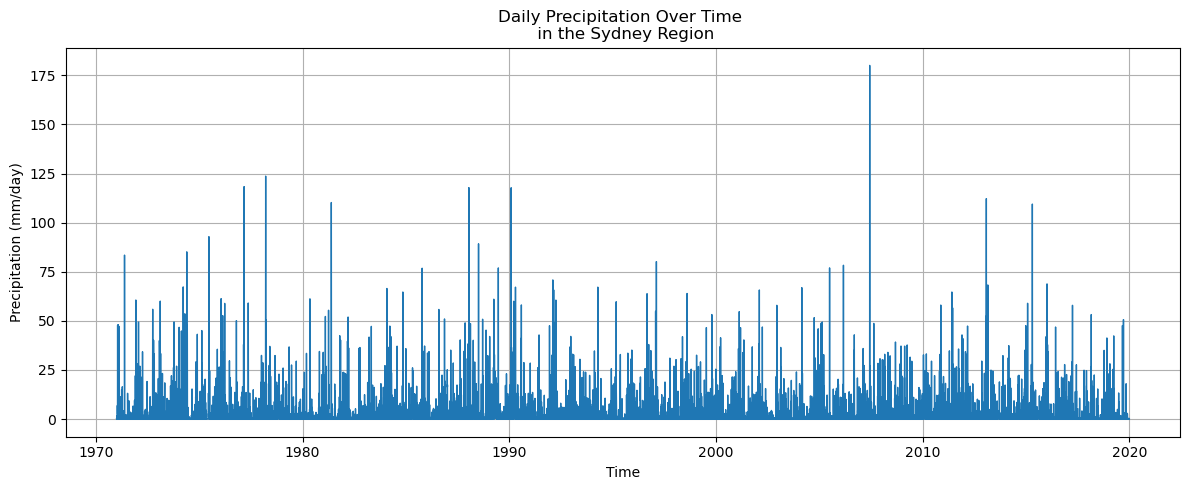

In [ ]:
target_lat = -33.0  
target_lon = 151.0

ds_point = ds.sel(lat=target_lat, lon=target_lon, method="nearest")


precip_ts = ds_point["precip"]  

print(precip_ts)


plt.figure(figsize=(12,5))
plt.plot(precip_ts["time"], precip_ts, linewidth=1)

plt.title(f"Daily Precipitation Over Time \n in the Sydney Region")
plt.xlabel("Time")
plt.ylabel("Precipitation (mm/day)")
plt.grid(True)
plt.tight_layout()
plt.show()

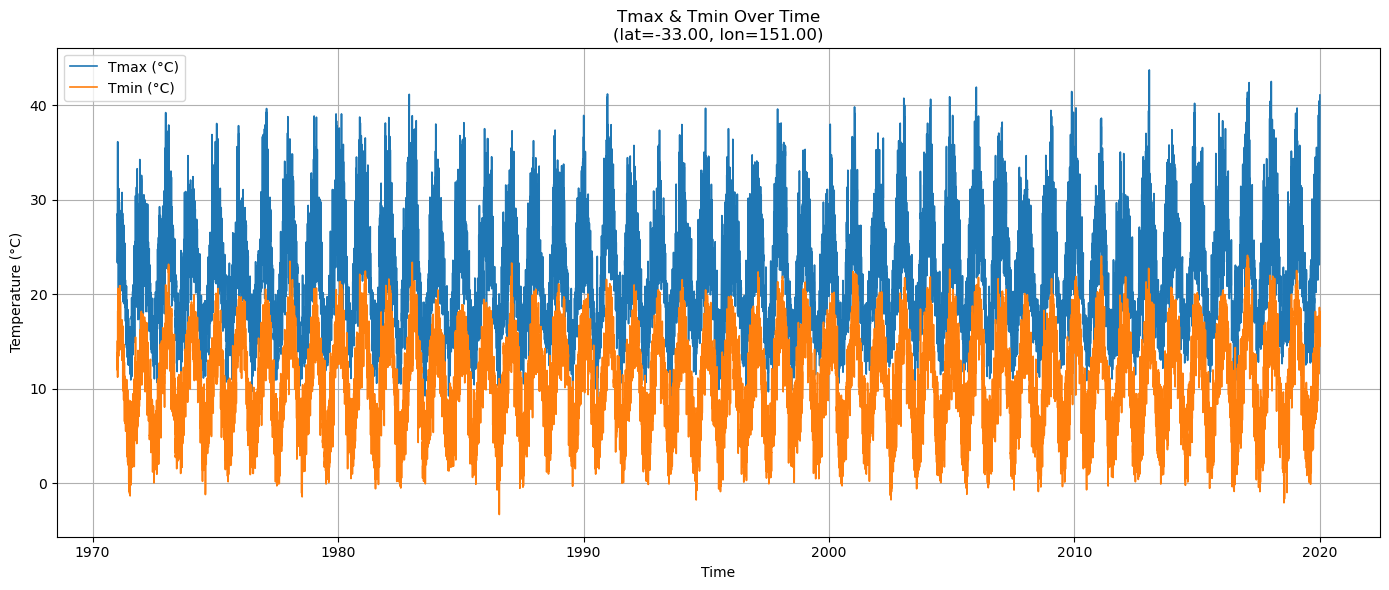

In [ ]:
ds_point = ds.sel(lat=target_lat, lon=target_lon, method="nearest")

tmax_ts = ds_point["tmax"]
tmin_ts = ds_point["tmin"]


plt.figure(figsize=(14,6))

plt.plot(tmax_ts['time'], tmax_ts, label="Tmax (°C)", linewidth=1.2)
plt.plot(tmin_ts['time'], tmin_ts, label="Tmin (°C)", linewidth=1.2)

plt.title(f"Tmax & Tmin Over Time\n(lat={float(ds_point.lat.values):.2f}, lon={float(ds_point.lon.values):.2f})")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

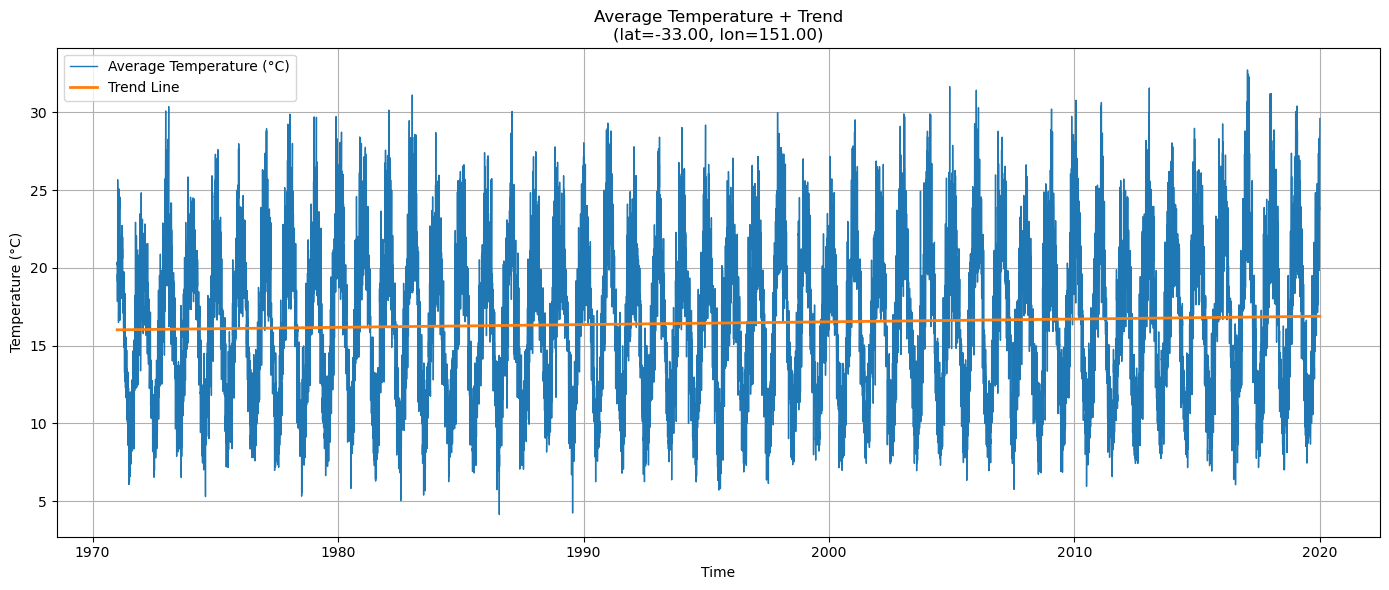

In [9]:
import numpy as np

tmax = ds_point["tmax"]
tmin = ds_point["tmin"]

# Compute average
tavg = (tmax + tmin) / 2

# Create a numeric index for the trend
x = np.arange(len(tavg))

# Fit a linear trend: slope * x + intercept
coef = np.polyfit(x, tavg.values, 1)
trend = coef[0] * x + coef[1]

# Plot
plt.figure(figsize=(14,6))
plt.plot(tavg["time"], tavg, label="Average Temperature (°C)", linewidth=1)
plt.plot(tavg["time"], trend, label="Trend Line", linewidth=2)

plt.title(f"Average Temperature + Trend\n(lat={float(ds_point.lat.values):.2f}, lon={float(ds_point.lon.values):.2f})")
plt.xlabel("Time")
plt.ylabel("Temperature (°C)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

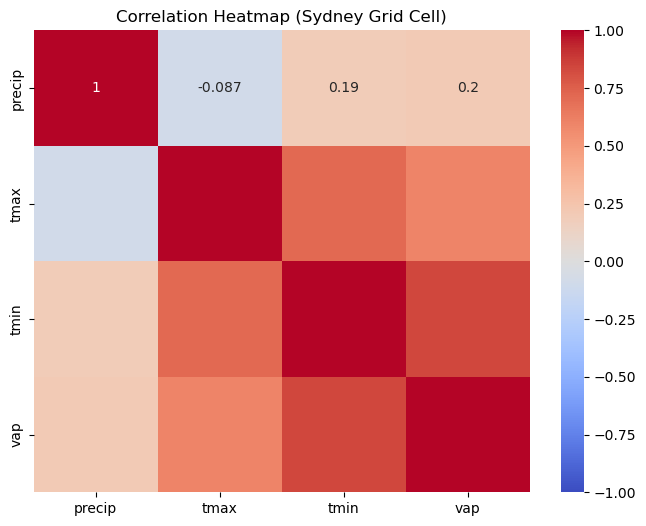

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset
ds = xr.open_zarr(store_url)
ds_point = ds.sel(lat=-33, lon=151, method='nearest')

# Convert to pandas
df = pd.DataFrame({
    "precip": ds_point["precip"].values,
    "tmax": ds_point["tmax"].values,
    "tmin": ds_point["tmin"].values,
    "vap": ds_point["vapourpres"].values,
}, index=ds_point["time"].values)

# Compute correlation
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Heatmap (Sydney Grid Cell)")
plt.show()